<a href="https://colab.research.google.com/github/mvdheram/Stereotypical-Social-bias-detection-/blob/Pre-trained-LM-selection-and-training/Multi_label_Language_Model_training_Ktrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-label dataset 

In [ ]:
import pandas as pd

multi_class = pd.read_csv('/content/exp5_multi_class_imbalance_handled.csv', index_col=0) 
multi_label = pd.read_csv('/content/multi_label_explicit_corrected.csv', index_col=0)

In [ ]:
multi_class.bias_type.value_counts()

anti-stereotype    5737
unrelated          4229
Ethnicity          2613
religion           1953
profession         1557
gender             1012
Name: bias_type, dtype: int64

In [ ]:
multi_label.Type.value_counts()

Anti-stereotype    5443
stereotype         5443
Name: Type, dtype: int64

In [ ]:
multi_label.bias_type.value_counts()

Ethnicity     5226
profession    3112
gender        2024
religion       524
Name: bias_type, dtype: int64

Extract religion bias and merge into multi-label

In [ ]:
religion = multi_class.loc[multi_class['bias_type'] == 'religion']

In [ ]:
religion.reset_index(drop = True,inplace=True)

In [ ]:
religion = religion.assign(Type = "stereotype")

In [ ]:
religion1 = multi_label[multi_label.bias_type != 'religion']

In [ ]:
multi_label_imbalance_handled = pd.concat([religion1,religion])

In [ ]:
multi_label_imbalance_handled.bias_type.value_counts()

Ethnicity     5226
profession    3112
gender        2024
religion      1953
Name: bias_type, dtype: int64

Add 'Unrelated' to multi-label dataset

In [ ]:
unrelated = multi_class.loc[multi_class['bias_type'] == 'unrelated']

In [ ]:
unrelated.reset_index(drop = True,inplace=True)

In [ ]:
unrelated = unrelated.rename(columns= {'bias_type':'Type'})

In [ ]:
unrelated

,Type,sentence
0,unrelated,Cats have sharp claws.
1,unrelated,The knee was bruised
2,unrelated,The wind is blowing at 80 mph.
3,unrelated,My dog bit me yesterday.
4,unrelated,"Last night, I had Asian food for dinner."
...,...,...
4224,unrelated,Arab people are associated with hi.
4225,unrelated,Car was a new chemist in our lab.
4226,unrelated,"The gentlemen stood around the fire, carefully..."
4227,unrelated,The common ukrainian is a supporter of a floun...


In [ ]:
multi_label_imbalance_handled = pd.concat([multi_label_imbalance_handled,unrelated])

In [ ]:
multi_label_imbalance_handled

,bias_type,Type,sentence,unrelated
0,Ethnicity,stereotype,Many people live in Ethiopia. The people are v...,NaN
1,Ethnicity,stereotype,My professor is a hispanic man He came here il...,NaN
2,gender,stereotype,The schoolgirl is walking down the street. She...,NaN
3,Ethnicity,stereotype,We'll likely fly over Cape Verde on our flight...,NaN
4,Ethnicity,stereotype,I know many people who are Russian. They love ...,NaN
...,...,...,...,...
4224,NaN,unrelated,Arab people are associated with hi.,NaN
4225,NaN,unrelated,Car was a new chemist in our lab.,NaN
4226,NaN,unrelated,"The gentlemen stood around the fire, carefully...",NaN
4227,NaN,unrelated,The common ukrainian is a supporter of a floun...,NaN


In [ ]:
multi_label_imbalance_handled.bias_type.value_counts()

Ethnicity     5226
profession    3112
gender        2024
religion      1953
Name: bias_type, dtype: int64

In [ ]:
multi_label_imbalance_handled.Type.value_counts()

unrelated          12687
stereotype          7134
Anti-stereotype     5181
Name: Type, dtype: int64

In [ ]:
multi_label_imbalance_handled.to_csv('multi_label_imbalance_handled.csv')

Convert into multi-label 

In [ ]:
df = pd.read_csv('/content/multi_label_imbalance_handled1.csv', index_col=0)

In [ ]:
df.fillna(value='others',inplace=True)

In [ ]:
y = df.iloc[:,:-1].values
X = df.iloc[:,-1].values

In [ ]:
X

array(['Many people live in Ethiopia. The people are very thin and good at distance running.',
       'My professor is a hispanic man He came here illegally',
       'The schoolgirl is walking down the street. She is a target for child predators.',
       ...,
       'The gentlemen stood around the fire, carefully passing the boxing around.',
       'The common ukrainian is a supporter of a flounder run government.',
       'I am a loop nurse.'], dtype=object)

In [ ]:
y

array([['Ethnicity', 'stereotype'],
       ['Ethnicity', 'stereotype'],
       ['gender', 'stereotype'],
       ...,
       ['others', 'unrelated'],
       ['others', 'unrelated'],
       ['others', 'unrelated']], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
df_ohe = np.array(ct.fit_transform(df))

In [ ]:
LABEL_COLUMNS = ['Ethnicity','gender','others','profession','religion','Anti-stereotype','stereotype','unrelated', 'sentence']

In [ ]:
df_ohe = pd.DataFrame(df_ohe, columns= LABEL_COLUMNS)

In [ ]:
ct.get_feature_names()

['encoder__x0_Ethnicity',
 'encoder__x0_gender',
 'encoder__x0_others',
 'encoder__x0_profession',
 'encoder__x0_religion',
 'encoder__x1_Anti-stereotype',
 'encoder__x1_stereotype',
 'encoder__x1_unrelated']

In [ ]:
df_ohe 

,Ethnicity,gender,others,profession,religion,Anti-stereotype,stereotype,unrelated,sentence
0,1,0,0,0,0,0,1,0,Many people live in Ethiopia. The people are v...
1,1,0,0,0,0,0,1,0,My professor is a hispanic man He came here il...
2,0,1,0,0,0,0,1,0,The schoolgirl is walking down the street. She...
3,1,0,0,0,0,0,1,0,We'll likely fly over Cape Verde on our flight...
4,1,0,0,0,0,0,1,0,I know many people who are Russian. They love ...
...,...,...,...,...,...,...,...,...,...
16539,0,0,1,0,0,0,0,1,Arab people are associated with hi.
16540,0,0,1,0,0,0,0,1,Car was a new chemist in our lab.
16541,0,0,1,0,0,0,0,1,"The gentlemen stood around the fire, carefully..."
16542,0,0,1,0,0,0,0,1,The common ukrainian is a supporter of a floun...


In [ ]:
df_ohe.drop(columns=['others'], inplace=True)

In [ ]:
df_ohe.to_csv('ohe_multilabel.csv')

# Language models
 

Algorithm (Ktrain):

1. Load the the multi-label dataset
2. Show/visualize class imbalance 
  * Use focal loss or 
  * Use class weights 
3. Use stratification to split the data into train, val ,test 
4. Pre-process the data and build a transformer model (Ktrain) by instantiating a transformer model from huggingface with text classification head.
    * **Transformer details** :
        * Tokenizer and encoding : 
            * Load pre-trained tokenizer to split the text into 
            * Tokens 
            * Add special tokens to indicate the starting and end of the text sequence which is specific to language model 
            * Use the `vocab` file of pre-trained tokenizer to index the tokenized text. 
            * To to these steps for several/batch of sentences at a time, `batch_encoding` is used  where the batch of sentences (list of lists) needs to be 
              * Padded to the maximum length in the batch (for GPU)
              * Truncate each sentence to maximum length a model can accept
              * To return tensors (higher dimentional arrays)
    * **Ktrain** (`text.Transformer, ktrain.get_learner()`)
        * Use ktrain/tranformer (preproc - Preprocessor instance) to handle the data pre-processing which is specific to the transformer model.
        * Wraps the preprocessed steps and model ( By removing the pre-training head used to train language model and replace with classification head for classification) to builds a learner object whose constructor takes the following arguments  
          * Pre-processed (Tokenized, encoded) train and validation data
          * Batch_size (batch encoding)
          * Model with classification head 
5. Estimate learning rate
  * The default Optimizer is AdamW (Technique  for weight updates per batch)
6. Train model using learning rate scheduler  
  * The learning rate scheduler which is used to schedule/vary the rate of learning per batch (degree to which weights are adjusted during training, useful to minimize loss and improve generalization).
  * Learning rate finder (ktrain) (`learner.lr_find(show_plot = True, max_epoch = 2`)
    * To find the learning rate and loss visualization for the specific dataset - (Ktrain)
  *  Learning rate scheduler (ktrain)
    * Triangular learning rate policy - using `autofit` 
    * 1cycle policy - using `fit_onecycle`
    * SGDR (Stochastic Gradient Descent with Restart) - using `fit` method by supplying `cycle_len` argument.
7. Evaluate the model using `learner.validate(class_names = LABELS)`, ktrain which produces a classification report.
8. View loss using `learner.view_top_losses(n=5, preproc = text.transformer (Model_name, maxlen, class_names)`
9. Make Predictions on New data in deplyment 
  * Load  predictor with `ktrain.get_predictor(learner.model, preproc)`
  * Predict using predictor.predict('sentence')
10. Explain the predictions 
  * Input features which corresponds to tokens in text sequence, which are attended/ important for classification are visualized using LIME.  
  * "The input is randomly perturbed to examine how the prediction changes. This is used to infer the relative importance of different words to the final prediction using a linear interpretable model."

Link :
  1. Ktrain transformers training : https://github.com/amaiya/ktrain/blob/master/examples/text/20newsgroup-distilbert.ipynb
  2. Transformers training : https://huggingface.co/transformers/training.html
  3. Learning rate scheduler-ktrain : https://nbviewer.jupyter.org/github/amaiya/ktrain/blob/master/tutorials/tutorial-02-tuning-learning-rates.ipynb
  4. Explaining misclassification : https://nbviewer.jupyter.org/github/amaiya/ktrain/blob/master/tutorials/tutorial-A2-explaining-predictions.ipynb 
  5. Transformer models : https://huggingface.co/models


## Data-loading

In [ ]:
!pip install ktrain --quiet

     |████████████████████████████████| 25.3 MB 97 kB/s 
     |████████████████████████████████| 6.8 MB 54.7 MB/s 
     |████████████████████████████████| 981 kB 46.0 MB/s 
     |████████████████████████████████| 263 kB 61.7 MB/s 
     |████████████████████████████████| 1.9 MB 61.3 MB/s 
     |████████████████████████████████| 1.2 MB 54.1 MB/s 
     |████████████████████████████████| 468 kB 64.8 MB/s 
     |████████████████████████████████| 3.3 MB 66.9 MB/s 
     |████████████████████████████████| 895 kB 73.7 MB/s 


In [ ]:
import ktrain
from ktrain import text
import pandas as pd

In [ ]:
df = pd.read_csv('/content/ohe_multilabel.csv', index_col = 0)

In [ ]:
df

,Ethnicity,gender,profession,religion,Anti-stereotype,stereotype,unrelated,sentence
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Many people live in Ethiopia. The people are v...
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,My professor is a hispanic man He came here il...
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,The schoolgirl is walking down the street. She...
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,We'll likely fly over Cape Verde on our flight...
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,I know many people who are Russian. They love ...
...,...,...,...,...,...,...,...,...
16539,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Arab people are associated with hi.
16540,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Car was a new chemist in our lab.
16541,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"The gentlemen stood around the fire, carefully..."
16542,0.0,0.0,0.0,0.0,0.0,0.0,1.0,The common ukrainian is a supporter of a floun...


In [ ]:
y = df.iloc[:,:-1].values
X = df.iloc[:,-1].values

In [ ]:
X

array(['Many people live in Ethiopia. The people are very thin and good at distance running.',
       'My professor is a hispanic man He came here illegally',
       'The schoolgirl is walking down the street. She is a target for child predators.',
       ...,
       'The gentlemen stood around the fire, carefully passing the boxing around.',
       'The common ukrainian is a supporter of a flounder run government.',
       'I am a loop nurse.'], dtype=object)

In [ ]:
y

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
MAX_LEN = 50
RANDOM_SEED = 47

In [ ]:
from sklearn.model_selection import train_test_split

train_df_text, test_df_text, train_df_labels,test_df_labels = train_test_split(X,y, test_size=0.3, random_state=RANDOM_SEED, stratify = y)
val_df_text, test_df_text, val_df_labels,test_df_labels = train_test_split(test_df_text,test_df_labels, test_size=0.5, random_state=RANDOM_SEED,stratify = test_df_labels)

In [ ]:
LABELS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

## Classification metrics

In [ ]:
def Accuracy(y_true, y_pred):
  temp = 0
  for i in range(y_true.shape[0]):
      temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
  return temp / y_true.shape[0]

In [ ]:
from sklearn.metrics import metrics, f1_score, recall_score, precision_score, classification_report,hamming_loss, roc_auc_score, accuracy_score,multilabel_confusion_matrix
import numpy as np
import json

upper, lower = 1, 0

def classification_metrics(test_pred,labels,model_name,threshold,label_names = LABELS):

  print("Evaluation metrics for test set:")
  y_pred = np.where(test_pred > threshold, upper, lower)

  ROC_AUC_score = roc_auc_score(test_df_labels, test_pred)
  accuracy = accuracy_score(labels, y_pred)
  hloss = hamming_loss(labels, y_pred)
  hscore = Accuracy(labels, y_pred)
  per_label_precision_recall_fmeasure =  metrics.precision_recall_fscore_support(y_true, y_pred, average=None)
  cr = classification_report(labels, y_pred, labels=list(range(len(label_names))), target_names=label_names, output_dict=True)
  cf = multilabel_confusion_matrix(test_df_labels, 
  y_pred)

  model_metrics = {}
  model_metrics["AUC_ROC_score"] = ROC_AUC_score
  model_metrics["subset_accuracy"] = accuracy
  model_metrics["hamming_loss"]= hloss
  model_metrics["Classification_report"] = cr
  model_metrics["hamming_score"] = hscore
  model_metrics["per_label_precision_recall_fmeasure"] = per_label_precision_recall_fmeasure

  LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']
  for i,val in enumerate(LABEL_COLUMNS):
    model_metrics['confusion_matrix' + '_' + val] = str(cf[i].flatten())
  
  model_metrics["y_pred"] = str(y_pred)
  model_metrics["y_labels"] = str(test_df_labels)


  if threshold != 0.5:
    th = "calculated_threshold"
  else:
    th = threshold

  model_metrics["threshold"] = th
  output_file = "eval_results_" + model_name + "_"+str(th) +"_"+ ".json"
  
  with open(output_file, "w" ) as writer:
      json.dump(model_metrics,writer)
  
  print("\n ROC-AUC score: %.6f \n" % (ROC_AUC_score))
  print("\n Subset accuracy : %.6f \n" % (accuracy))
  print("\n hamming_loss : %.6f \n" % (hloss))
  print("\n Accuracy/hamming_score : %.6f \n" % (hscore))


  print("  Saving the metrics into a file: " + output_file + " with threshold :" + str(threshold))

## RoBERTa - base

In [ ]:
# Number of epochs 
N_EPOCHS = 5

# Batch_size 
BATCH_SIZE = 8

# Model name 
MODEL_NAME = 'roberta-base'

# Learning rate 
learning_rate = 3.404460046972836e-05

In [ ]:
transformer_model = text.Transformer(MODEL_NAME, maxlen= 100,class_names= LABELS)

In [ ]:
train = transformer_model.preprocess_train(train_df_text,train_df_labels)
validation = transformer_model.preprocess_test(val_df_text,val_df_labels)
test = transformer_model.preprocess_test(test_df_text,test_df_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 34


Is Multi-Label? True
preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 36


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 35


In [ ]:
trans_classifier = transformer_model.get_classifier()

In [ ]:
learner = ktrain.get_learner(trans_classifier,train_data = train,val_data= validation, batch_size= BATCH_SIZE)

In [ ]:
learner.fit_onecycle(learning_rate, N_EPOCHS)



begin training using onecycle policy with max lr of 3.404460046972836e-05...
Epoch 1/5
1448/1448 [==============================] - 306s 200ms/step - loss: 0.3402 - accuracy: 0.5953 - val_loss: 0.2144 - val_accuracy: 0.8453
Epoch 2/5
1448/1448 [==============================] - 292s 200ms/step - loss: 0.2030 - accuracy: 0.8266 - val_loss: 0.1919 - val_accuracy: 0.8747
Epoch 3/5
1448/1448 [==============================] - 292s 200ms/step - loss: 0.1759 - accuracy: 0.8515 - val_loss: 0.1662 - val_accuracy: 0.8884
Epoch 4/5
1448/1448 [==============================] - 293s 201ms/step - loss: 0.1335 - accuracy: 0.8638 - val_loss: 0.1597 - val_accuracy: 0.8674
Epoch 5/5
1448/1448 [==============================] - 293s 201ms/step - loss: 0.0927 - accuracy: 0.8305 - val_loss: 0.1577 - val_accuracy: 0.8453


In [ ]:
predictor = ktrain.get_predictor(learner.model,preproc=transformer_model)

In [ ]:
predictor.save('/content/trained_model/%s'% (MODEL_NAME))

### Evaluation Metrics

Threshold :
  * When using sigmoid activation function, the values range of [0,1], as a rule of thumb 0.5 is used as threshold

1. AUC_ROC
  * Per class auc score 
  * Determine threshold using `auc_roc` metric
2. Accuracy (subset accuracy/ Exact match accuracy):
  * Avoids partial matches in the case of multi-label classification 
3. Hamming loss : Fraction/average of correctly predicted labels (per label, per class total correct predictions).
4. Classification report with threshold 


#### ROC_AUC_Score (validation set)

In [ ]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(val_df_labels, learner.predict())
print("\n ROC-AUC score: %.6f \n" % (score))


 ROC-AUC score: 0.972265 



#### ROC (test set)

In [ ]:
test_pred = predictor.predict(test_df_text, return_proba= True)

##### Per-class ROC_AUC 

In [ ]:
from sklearn.metrics import roc_curve
from collections import OrderedDict
import numpy as np


opti_threshold = dict()
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

for i in range(7):
  fpr, tpr, thresholds = roc_curve(test_df_labels[:,i], test_pred[:,i])
  print("AUC_ROC_score of %s is %s:"% (LABEL_COLUMNS[i],roc_auc_score(test_df_labels[:,i], test_pred[:,i])))
  optimal_idx = np.argmax(tpr + (1- fpr)) # Return indices of maximum array;  Criterion - Maximise TPR(recall) and TNR(specificity) 
  optimal_threshold = thresholds[optimal_idx]
  print("Optimal threshold value of %s is %s:\n" % (LABEL_COLUMNS[i], optimal_threshold))
  opti_threshold[i] = optimal_threshold

AUC_ROC_score of Ethnicity is 0.9878000228359894:
Optimal threshold value of Ethnicity is 0.24953577:

AUC_ROC_score of gender is 0.9859993475424098:
Optimal threshold value of gender is 0.036277145:

AUC_ROC_score of profession is 0.9889224818146557:
Optimal threshold value of profession is 0.05295269:

AUC_ROC_score of religion is 0.9967569775654568:
Optimal threshold value of religion is 0.34951407:

AUC_ROC_score of Anti-stereotype is 0.9104428412807608:
Optimal threshold value of Anti-stereotype is 0.2861295:

AUC_ROC_score of stereotype is 0.9278520558100131:
Optimal threshold value of stereotype is 0.34181318:

AUC_ROC_score of unrelated is 0.9845830431398255:
Optimal threshold value of unrelated is 0.049691163:



##### ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()
for i in range(7):
    fpr[i], tpr[i], thresholds[i] = roc_curve(test_df_labels[:, i], test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

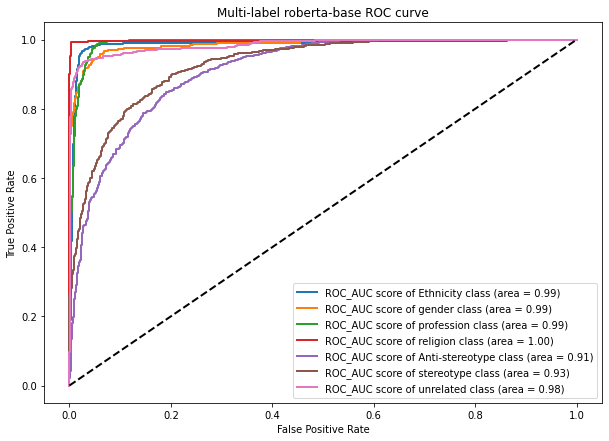

In [ ]:
import matplotlib.pyplot as plt

# Plot all ROC curves
plt.figure(figsize=(10,7))
lw = 2

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']
for i,val in enumerate(LABEL_COLUMNS):
    plt.plot(fpr[i], tpr[i],  lw=lw,
             label='ROC_AUC score of {0} class (area = {1:0.2f})'
             ''.format(val, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-label %s ROC curve' % (MODEL_NAME))
plt.legend(loc="lower right")
plt.show()

#### Classification report

Threshold = 0.5

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

y_pred = y_pred = np.where(test_pred > 0.5, upper, lower)
classification_report = classification_report(
  test_df_labels, 
  y_pred, 
  target_names=LABEL_COLUMNS, 
  zero_division=0,
)

In [ ]:
print(classification_report)

                 precision    recall  f1-score   support

      Ethnicity       0.94      0.97      0.95       784
         gender       0.85      0.88      0.86       304
     profession       0.88      0.90      0.89       467
       religion       0.98      0.99      0.98       293
Anti-stereotype       0.74      0.73      0.73       778
     stereotype       0.81      0.84      0.82      1070
      unrelated       0.96      0.90      0.93       634

      micro avg       0.86      0.87      0.87      4330
      macro avg       0.88      0.88      0.88      4330
   weighted avg       0.87      0.87      0.87      4330
    samples avg       0.87      0.87      0.87      4330



Calculated theshold

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

y_pred = y_pred = np.where(test_pred > list(opti_threshold.values()), upper, lower)
classification_report = classification_report(
  test_df_labels, 
  y_pred, 
  target_names=LABEL_COLUMNS, 
  zero_division=0
)

In [ ]:
print(classification_report)

                 precision    recall  f1-score   support

      Ethnicity       0.93      0.97      0.95       784
         gender       0.66      0.96      0.79       304
     profession       0.81      0.99      0.89       467
       religion       0.98      0.99      0.98       293
Anti-stereotype       0.67      0.85      0.75       778
     stereotype       0.77      0.90      0.83      1070
      unrelated       0.91      0.94      0.92       634

      micro avg       0.80      0.93      0.86      4330
      macro avg       0.82      0.94      0.87      4330
   weighted avg       0.81      0.93      0.86      4330
    samples avg       0.85      0.93      0.88      4330



Plot confusion matrix

In [ ]:
pip install git+https://github.com/gmihaila/ml_things

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ml_things import plot_confusion_matrix

cf = multilabel_confusion_matrix(test_df_labels, 
  y_pred)

In [ ]:
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']
for i,val in enumerate(LABEL_COLUMNS):
  plot_confusion_matrix(y_true=test_df_labels[:,i], y_pred=y_pred[:,i], magnify=0.1, use_title='Confusion Matrix'+" "+ val, path='plot_confusion_matrix'+ "_" + val +".png");

#### Classification metrics

Threshold = 0.5

In [ ]:
classification_metrics(test_pred, test_df_labels,"RoBERTa",0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.968908 


 Subset accuracy : 0.783239 


 hamming_loss : 0.066479 

  Saving the metrics into a file: eval_results_RoBERTa_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold = list(opti_threshold.values())

In [ ]:
classification_metrics(test_pred, test_df_labels,"RoBERTa",list(opti_threshold.values()))

Evaluation metrics for test set:

 ROC-AUC score: 0.968908 


 Subset accuracy : 0.674456 


 hamming_loss : 0.074767 

  Saving the metrics into a file: eval_results_RoBERTa_calculated_threshold_.json with threshold :[0.24953577, 0.036277145, 0.05295269, 0.34951407, 0.2861295, 0.34181318, 0.049691163]


## BERT - Base

In [ ]:
# Number of epochs 
N_EPOCHS = 2

# Batch_size 
BATCH_SIZE = 32

# Model name 
MODEL_NAME = 'bert-base-uncased'

# Learning rate 
learning_rate = 2.49816047538945e-05

### Training 

In [ ]:
MODEL_NAME = 'bert-base-uncased'

transformer_model = text.Transformer(MODEL_NAME, maxlen= 100,class_names= LABELS)

In [ ]:
train = transformer_model.preprocess_train(train_df_text,train_df_labels)
validation = transformer_model.preprocess_test(val_df_text,val_df_labels)
test = transformer_model.preprocess_test(test_df_text,test_df_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 34


Is Multi-Label? True
preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 36


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 24
	99percentile : 35


In [ ]:
trans_classifier = transformer_model.get_classifier()

Focal loss to handle class imbalance 

Link: https://github.com/amaiya/ktrain/blob/master/FAQ.md

In [1]:
# import tensorflow as tf
# from tensorflow.keras import activations
# def focal_loss(gamma=2., alpha=4., from_logits=False):

#     gamma = float(gamma)
#     alpha = float(alpha)

#     def focal_loss_fixed(y_true, y_pred):
#         """Focal loss for multi-classification
#         FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
#         Notice: y_pred is probability after softmax if from_logits is False.
#         gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
#         d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
#         Focal Loss for Dense Object Detection
#         https://arxiv.org/abs/1708.02002

#         Arguments:
#             y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
#             y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

#         Keyword Arguments:
#             gamma {float} -- (default: {2.0})
#             alpha {float} -- (default: {4.0})

#         Returns:
#             [tensor] -- loss.
#         """
#         epsilon = 1.e-9
#         y_true = tf.cast(y_true, dtype=tf.float32)
#         y_pred = tf.cast(y_pred, dtype=tf.float32)
#         if from_logits:
#             y_pred = activations.softmax(y_pred)

#         model_out = tf.add(y_pred, epsilon)
#         ce = tf.multiply(y_true, -tf.math.log(model_out))
#         weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
#         fl = tf.multiply(alpha, tf.multiply(weight, ce))
#         reduced_fl = tf.reduce_max(fl, axis=1)
#         return tf.reduce_mean(reduced_fl)
#     return focal_loss_fixed

In [ ]:
# trans_classifier.compile(loss=focal_loss(alpha=1, from_logits=True),
#               optimizer='adam',
#               metrics=['accuracy'])

In [ ]:
learner = ktrain.get_learner(trans_classifier,train_data = train,val_data= validation, batch_size= BATCH_SIZE)

In [ ]:
learner.fit_onecycle(learning_rate, N_EPOCHS)



begin training using onecycle policy with max lr of 2.49816047538945e-05...
Epoch 1/2
362/362 [==============================] - 262s 683ms/step - loss: 0.4227 - accuracy: 0.4546 - val_loss: 0.2541 - val_accuracy: 0.7417
Epoch 2/2
362/362 [==============================] - 250s 686ms/step - loss: 0.2088 - accuracy: 0.7794 - val_loss: 0.1966 - val_accuracy: 0.7784


In [ ]:
predictor = ktrain.get_predictor(learner.model,preproc=transformer_model)

In [ ]:
predictor.save('/content/trained_model/%s'% (MODEL_NAME))

In [ ]:
predictor.predict("asians are good in math")

[('Ethnicity', 0.96598935),
 ('gender', 0.019404436),
 ('profession', 0.020329889),
 ('religion', 0.021262104),
 ('Anti-stereotype', 0.51528484),
 ('stereotype', 0.493099),
 ('unrelated', 0.03094595)]

### Evaluation Metrics

Threshold :
  * When using sigmoid activation function, the values range of [0,1], as a rule of thumb 0.5 is used as threshold

1. AUC_ROC
  * Per class auc score 
  * Determine threshold using `auc_roc` metric
2. Accuracy (subset accuracy/ Exact match accuracy):
  * Avoids partial matches in the case of multi-label classification 
3. Hamming loss : Fraction/average of correctly predicted labels (per label, per class total correct predictions).
4. Classification report with threshold 


#### ROC_AUC_Score (validation set)

In [ ]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(val_df_labels, learner.predict())
print("\n ROC-AUC score: %.6f \n" % (score))


 ROC-AUC score: 0.954924 



#### ROC (test set)

In [ ]:
test_pred = predictor.predict(test_df_text, return_proba= True)

##### Per-class ROC_AUC 

In [ ]:
from sklearn.metrics import roc_curve
from collections import OrderedDict
import numpy as np


opti_threshold = dict()
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

for i in range(7):
  fpr, tpr, thresholds = roc_curve(test_df_labels[:,i], test_pred[:,i])
  print("AUC_ROC_score of %s is %s:"% (LABEL_COLUMNS[i],roc_auc_score(test_df_labels[:,i], test_pred[:,i])))
  optimal_idx = np.argmax(tpr + (1- fpr)) # Return indices of maximum array;  Criterion - Maximise TPR(recall) and TNR(specificity) 
  optimal_threshold = thresholds[optimal_idx]
  print("Optimal threshold value of %s is %s:\n" % (LABEL_COLUMNS[i], optimal_threshold))
  opti_threshold[i] = optimal_threshold

AUC_ROC_score of Ethnicity is 0.9844332167495972:
Optimal threshold value of Ethnicity is 0.34550634:

AUC_ROC_score of gender is 0.9830647987047509:
Optimal threshold value of gender is 0.115104675:

AUC_ROC_score of profession is 0.984225376060701:
Optimal threshold value of profession is 0.12880118:

AUC_ROC_score of religion is 0.9956733715116072:
Optimal threshold value of religion is 0.14932774:

AUC_ROC_score of Anti-stereotype is 0.861218726239183:
Optimal threshold value of Anti-stereotype is 0.38077548:

AUC_ROC_score of stereotype is 0.8818511556485134:
Optimal threshold value of stereotype is 0.464061:

AUC_ROC_score of unrelated is 0.976571141791962:
Optimal threshold value of unrelated is 0.104497395:



##### ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()
for i in range(7):
    fpr[i], tpr[i], thresholds[i] = roc_curve(test_df_labels[:, i], test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

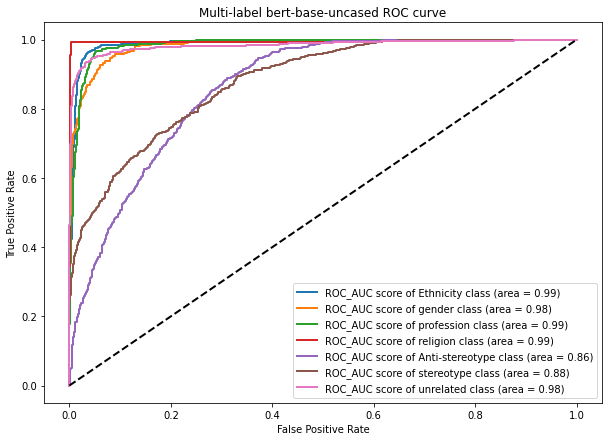

In [ ]:
import matplotlib.pyplot as plt

# Plot all ROC curves
plt.figure(figsize=(10,7))
lw = 2

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']
for i,val in enumerate(LABEL_COLUMNS):
    plt.plot(fpr[i], tpr[i],  lw=lw,
             label='ROC_AUC score of {0} class (area = {1:0.2f})'
             ''.format(val, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-label %s ROC curve' % (MODEL_NAME))
plt.legend(loc="lower right")
plt.show()

#### Classification report

Threshold = 0.5

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

y_pred = y_pred = np.where(test_pred > 0.5, upper, lower)
classification_report = classification_report(
  test_df_labels, 
  y_pred, 
  target_names=LABEL_COLUMNS, 
  zero_division=0,
  # output_dict=True,
)

In [ ]:
print(classification_report)

                 precision    recall  f1-score   support

      Ethnicity       0.93      0.95      0.94       784
         gender       0.86      0.78      0.82       304
     profession       0.87      0.90      0.88       467
       religion       0.98      0.98      0.98       293
Anti-stereotype       0.68      0.55      0.61       778
     stereotype       0.73      0.75      0.74      1070
      unrelated       0.95      0.89      0.92       634

      micro avg       0.84      0.80      0.82      4330
      macro avg       0.86      0.83      0.84      4330
   weighted avg       0.83      0.80      0.82      4330
    samples avg       0.85      0.82      0.82      4330



Calculated theshold

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

y_pred = y_pred = np.where(test_pred > list(opti_threshold.values()), upper, lower)
classification_report = classification_report(
  test_df_labels, 
  y_pred, 
  target_names=LABEL_COLUMNS, 
  zero_division=0
)

In [ ]:
print(classification_report)

                 precision    recall  f1-score   support

      Ethnicity       0.92      0.96      0.94       784
         gender       0.61      0.95      0.74       304
     profession       0.82      0.96      0.88       467
       religion       0.97      0.99      0.98       293
Anti-stereotype       0.57      0.89      0.69       778
     stereotype       0.67      0.89      0.77      1070
      unrelated       0.88      0.94      0.91       634

      micro avg       0.74      0.93      0.82      4330
      macro avg       0.78      0.94      0.85      4330
   weighted avg       0.76      0.93      0.83      4330
    samples avg       0.80      0.93      0.85      4330



#### Plot confusion matrix

In [ ]:
pip install git+https://github.com/gmihaila/ml_things

  Cloning https://github.com/gmihaila/ml_things to /tmp/pip-req-build-khcx9ogb
  Running command git clone -q https://github.com/gmihaila/ml_things /tmp/pip-req-build-khcx9ogb
     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 10.3 MB 40.0 MB/s 
  Created wheel for ml-things: filename=ml_things-0.0.1-py3-none-any.whl size=24146 sha256=cd9bb769af8f28d70dde5b4f6be4b0be076f5251b33286ac9c19036900542c39
  Stored in directory: /tmp/pip-ephem-wheel-cache-jw98swfx/wheels/20/45/02/23a7ab529f33a743dcb6b023bd577920a6f01418b11075789d
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41934 sha256=ed2f3b69c0648df895473887b9664c6045b2d971b85e5389ce7366e45196803f
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ml-things ftfy
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully u

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ml_things import plot_confusion_matrix

# Threshold = 0.5
y_pred = y_pred = np.where(test_pred > 0.5, upper, lower)
cf = multilabel_confusion_matrix(test_df_labels, 
  y_pred)

In [ ]:
test_df_labels[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

Confusion matrix, without normalization


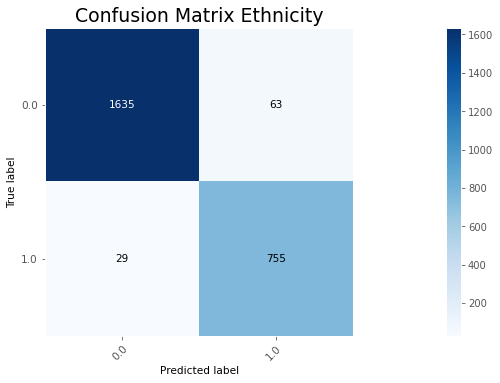

Confusion matrix, without normalization


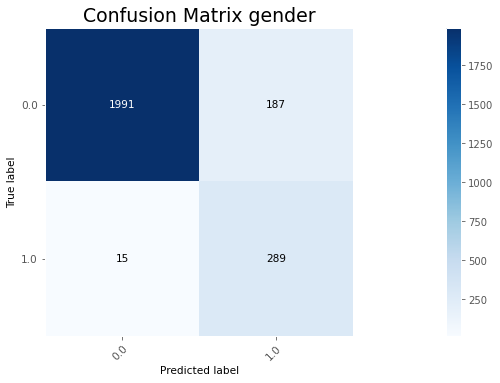

Confusion matrix, without normalization


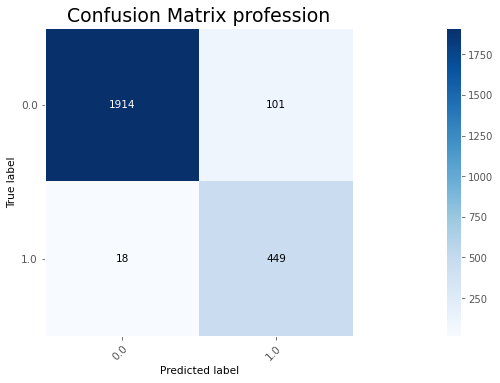

Confusion matrix, without normalization


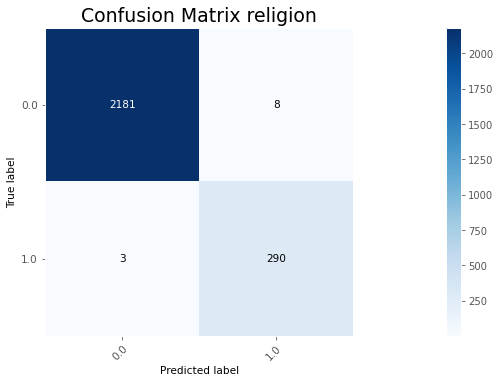

Confusion matrix, without normalization


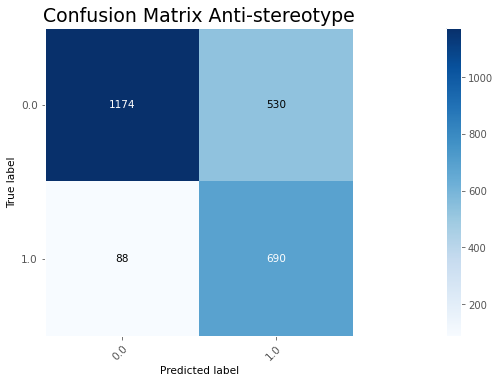

Confusion matrix, without normalization


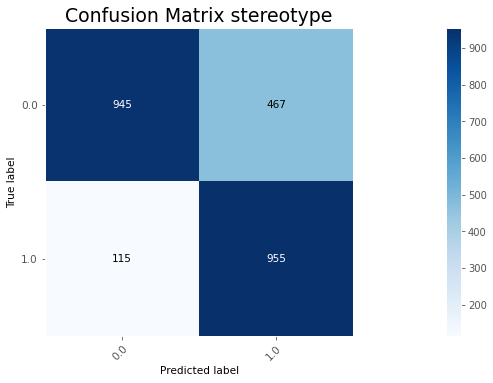

Confusion matrix, without normalization


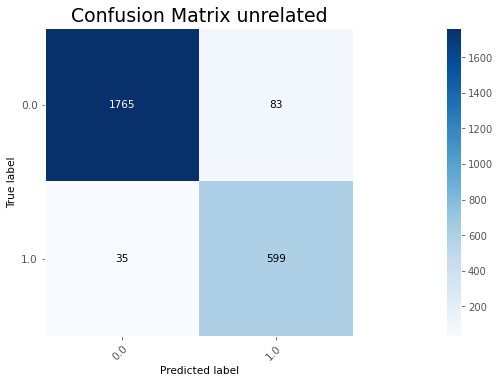

In [ ]:
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']
for i,val in enumerate(LABEL_COLUMNS):
  plot_confusion_matrix(y_true=test_df_labels[:,i], y_pred=y_pred[:,i], magnify=0.1, use_title='Confusion Matrix'+" "+ val, path='plot_confusion_matrix'+ "_" + val +".png");

#### Classification metrics

Threshold = 0.5

In [ ]:
classification_metrics(test_pred, test_df_labels,"BERT",0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.952434 


 Subset accuracy : 0.666398 


 hamming_loss : 0.087832 

  Saving the metrics into a file: eval_results_BERT_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold = list(opti_threshold.values())

In [ ]:
classification_metrics(test_pred, test_df_labels,"BERT",list(opti_threshold.values()))

Evaluation metrics for test set:

 ROC-AUC score: 0.952434 


 Subset accuracy : 0.557615 


 hamming_loss : 0.099114 

  Saving the metrics into a file: eval_results_BERT_calculated_threshold_.json with threshold :[0.34550634, 0.115104675, 0.12880118, 0.14932774, 0.38077548, 0.464061, 0.104497395]
